In [ ]:
import math

nums = [1, 2, 5, 1, 3, 100, 3, 5, 40, 45, 279, 130, 71]

# Solusi No 1

In [ ]:
#Urutkan list nums sesuai urutan dari yang terkecil hingga terbesar
nums.sort()

print(nums)

[1, 1, 2, 3, 3, 5, 5, 40, 45, 71, 100, 130, 279]


In [ ]:
def first_quartile(n):
    # Nomor 1a
    n_size = len(n)
    mid = int(n_size/2)

    lower_half = n[:mid]

    return median(lower_half)

def median(n):
    # Nomor 1b
    n_size = len(n)

    mid = int(n_size/2)
    if (n_size % 2 == 0):
      return (n[mid - 1] + n[mid])/2
    else:
      return n[mid]

def third_quartile(n):
    # Nomor 1c
    n_size = len(n)

    mid = int(n_size/2)

    if(n_size % 2 == 0):
      upper_half = n[mid:]
    else:
      upper_half = n[mid + 1:]

    return median(upper_half)

def iqr(n):
    return third_quartile(n) - first_quartile(n)

In [ ]:
print(first_quartile(nums))
print(median(nums))
print(third_quartile(nums))
print(iqr(nums))

# Nomor 1e
# Outlier = diluar range [Q1 - 1.5*IQR, Q3 + 1.5*IQR]

iqr = iqr(nums)
q1 = first_quartile(nums)
q3 = third_quartile(nums)

outliers = [ x for x in nums if (x < q1 - 1.5*iqr or x > q3 + 1.5*iqr) ]

print("Angka outlier dari data yang diberikan adalah sebagai berikut:")
for outlier in outliers:
  print(f"- {outlier}")

2.5
5
85.5
83.0
Angka outlier dari data yang diberikan adalah sebagai berikut:
- 279


# Solusi No 2

In [ ]:
import pandas as pd
import numpy as np

#Sesuaikan dengan path Anda untuk memuat file marketing_campaign.xlsx
df = pd.read_excel("marketing_campaign.xlsx")
print(df.shape)
df

(2240, 18)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntFruits,MntMeatProducts,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,88,546,8,4,7,0,0,0,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,1,6,1,2,5,0,0,0,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,49,127,8,10,4,0,0,0,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,4,20,2,4,6,0,0,0,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,43,118,5,6,5,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223,0,1,2013-06-13,46,43,182,9,4,5,0,0,0,0
2236,4001,1946,PhD,Together,64014,2,1,2014-06-10,56,0,30,8,5,7,0,0,0,0
2237,7270,1981,Graduation,Divorced,56981,0,0,2014-01-25,91,48,217,2,13,6,0,1,0,0
2238,8235,1956,Master,Together,69245,0,1,2014-01-24,8,30,214,6,10,3,0,0,0,0


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_for_outlier = df[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntFruits', 'MntMeatProducts', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']]

print(df_for_outlier.shape)
#Gunakan PCA untuk mereduksi dimensi dari dataframe df_for_outlier menjadi 2 dimensi, tampilkan juga dataframe setelah jadi 2 dimensi

# ASUMSI: Tidak perludilakukan transformasi = tidak usah dilakukan standardisasi data.

pca = PCA(n_components=2)
PCs = pca.fit_transform(df_for_outlier)

print(f"PCA Shape: {PCs.shape}")

new_df = df[["ID"]]

new_df['PC1'] = PCs[:, 0]
new_df['PC2'] = PCs[:, 1]

explained_variants = pca.explained_variance_ratio_
print(f"Princpe Components: {explained_variants}")

new_df

(2240, 14)
PCA Shape: (2240, 2)
Princpe Components: [9.99943178e-01 5.36149444e-05]


<ipython-input-542-8cc3d93aed5f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['PC1'] = PCs[:, 0]
<ipython-input-542-8cc3d93aed5f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['PC2'] = PCs[:, 1]


,ID,PC1,PC2
0,5524,6116.083502,-351.521114
1,2174,-5680.557121,133.596847
2,4141,19588.758170,138.098616
3,6182,-25378.228734,18.768296
4,5324,6268.880758,79.183590
...,...,...,...
2235,10870,9199.167968,30.643170
2236,4001,11989.333746,199.886912
2237,7270,4957.403209,-26.596531
2238,8235,17221.217808,40.939819


In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Terapkan LOF dengan hyperparameter n_neighbors = 1500. Tentukan ID pelanggan mana saja yang outlier

lof_df = new_df.copy()

n_neighbors = 1500

lof = LocalOutlierFactor(n_neighbors=1500)

scores = lof.fit_predict(lof_df[['PC1', 'PC2']])

outlier_indices = np.where(scores == -1)[0]

print(f"Terdapat sebanyak {len(outlier_indices)} customer yang merupakan outlier. Berikut adalah ID mereka:")

set_of_customers_lof = set()
# Identify the outlier data points
for i in range(len(scores)):
  if(scores[i] == -1):
    id = lof_df['ID'][i]
    print(f"ID: {id}")
    set_of_customers_lof.add(id)

Terdapat sebanyak 17 customer yang merupakan outlier. Berikut adalah ID mereka:
ID: 7215
ID: 1295
ID: 8475
ID: 2798
ID: 10089
ID: 2437
ID: 1503
ID: 4611
ID: 5555
ID: 1501
ID: 6862
ID: 5336
ID: 4931
ID: 4619
ID: 5250
ID: 11181
ID: 9432


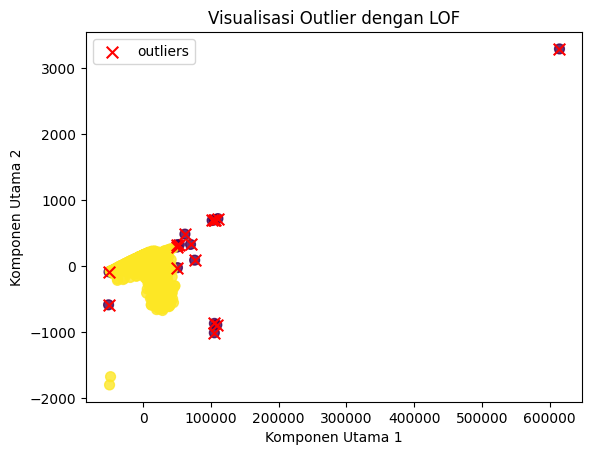

In [ ]:
import matplotlib.pyplot as plt

# Buatlah scatter plot yang memvisualisasikan data normal dan outlier (bedakan warna)
data = lof_df[['PC1', 'PC2']].to_numpy()

plt.scatter(data[:, 0], data[:, 1], c=scores, s=50, alpha=0.8)
plt.scatter(data[outlier_indices, 0], data[outlier_indices, 1], c='red', s=70, marker='x', label = 'outliers')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.title('Visualisasi Outlier dengan LOF')
plt.legend()
plt.show()

# Solusi No 3

In [ ]:
from sklearn.cluster import DBSCAN

# Terapkan DBSCAN dengan hyperparameter epsilon = 1500 dan minimum sample = 10. Tentukan ID pelanggan mana saja yang outlier

dbscan_df = new_df.copy()

epsilon = 1500
minimum_samples = 10

dbscan = DBSCAN(eps=epsilon, min_samples=minimum_samples)
dbscan.fit(dbscan_df[['PC1', 'PC2']])

labels = dbscan.labels_

outlier_indices = dbscan_df.index[labels == -1].tolist()

print(f"Terdapat sebanyak {len(outlier_indices)} customer yang merupakan outlier. Berikut adalah ID mereka:")

set_of_customers_dbscan = set()

for index in outlier_indices:
  id = dbscan_df.loc[index, 'ID']
  print(f"ID: {id}")
  set_of_customers_dbscan.add(id)

Terdapat sebanyak 23 customer yang merupakan outlier. Berikut adalah ID mereka:
ID: 5376
ID: 5255
ID: 7215
ID: 1295
ID: 8475
ID: 2798
ID: 10089
ID: 2437
ID: 1503
ID: 4611
ID: 4248
ID: 5555
ID: 1501
ID: 7451
ID: 6862
ID: 5336
ID: 11110
ID: 4931
ID: 4619
ID: 5250
ID: 11181
ID: 8720
ID: 9432


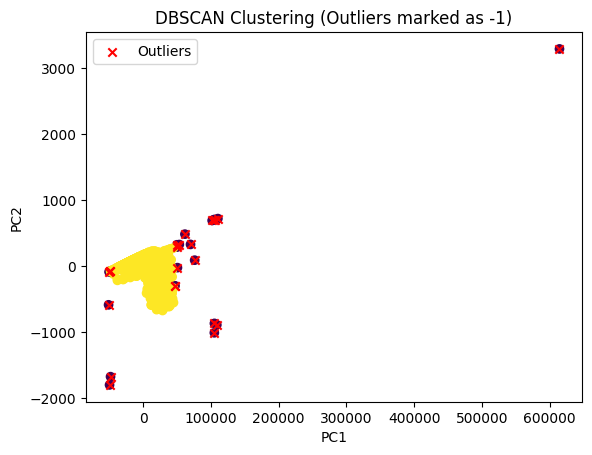

In [ ]:
# Buatlah scatter plot yang memvisualisasikan data normal dan outlier (bedakan warna)
plt.scatter(dbscan_df['PC1'], dbscan_df['PC2'], c=labels)
plt.title('DBSCAN Clustering (Outliers marked as -1)')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.scatter(dbscan_df.loc[outlier_indices, 'PC1'], dbscan_df.loc[outlier_indices, 'PC2'], c='red', marker='x', label='Outliers')
plt.legend()
plt.show()

# Solusi No 4

In [ ]:
from sklearn.ensemble import IsolationForest

# Terapkan Isolation Forest dengan hyperparameter n_estimators = 100, contamination = 0.0024, max_samples = 'auto'. Tentukan ID pelanggan mana saja yang outlier

iforest_df = new_df.copy()

n_estimators = 100
contamination = 0.0024
maximum_samples = 'auto'

isolation_forest = IsolationForest(contamination=contamination, n_estimators = n_estimators, max_samples= maximum_samples)

isolation_forest.fit(iforest_df[['PC1', 'PC2']])

anomaly_scores = isolation_forest.score_samples(iforest_df[['PC1', 'PC2']])

threshold = -0.7

outlier_indices = df.index[anomaly_scores < threshold].tolist()

print(f"Terdapat sebanyak {len(outlier_indices)} customer yang merupakan outlier. Berikut adalah ID mereka:")

set_of_customers_iforest = set()

for index in outlier_indices:
  id = iforest_df.loc[index, 'ID']
  print(f"ID: {id}")
  set_of_customers_iforest.add(id)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Terdapat sebanyak 13 customer yang merupakan outlier. Berikut adalah ID mereka:
ID: 5376
ID: 1295
ID: 8475
ID: 1503
ID: 5555
ID: 1501
ID: 5336
ID: 4931
ID: 4619
ID: 5250
ID: 11181
ID: 8720
ID: 9432


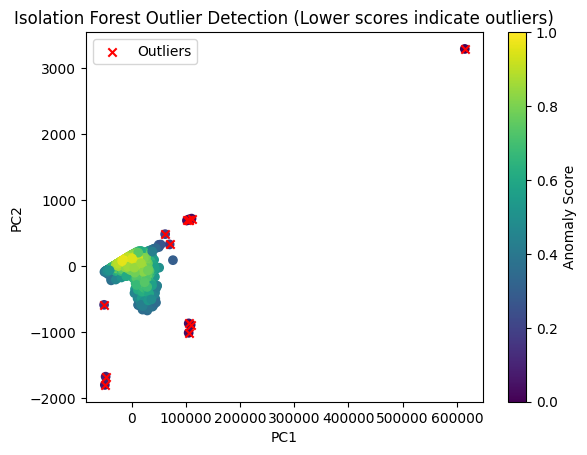

In [ ]:
# Buatlah scatter plot yang memvisualisasikan data normal dan outlier (bedakan warna)

plt.scatter(iforest_df['PC1'], iforest_df['PC2'], c=anomaly_scores)
plt.title('Isolation Forest Outlier Detection (Lower scores indicate outliers)')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.scatter(iforest_df.loc[outlier_indices, 'PC1'], iforest_df.loc[outlier_indices, 'PC2'], c='red', marker='x', label='Outliers')
plt.colorbar(label='Anomaly Score')
plt.legend()
plt.show()

# Solusi No 5

In [ ]:
# Tentukan ID pelanggan yang dideteksi outlier oleh ketiga algoritma

# Kita dapat melakukan intersection terhadap ketiga algoritma tersebut

set_of_customers = set_of_customers_lof.intersection(set_of_customers_dbscan).intersection(set_of_customers_iforest)

print(f"Terdapat sebanyak {len(set_of_customers)} customer yang merupakan outlier. Berikut adalah ID mereka:")

for customer in set_of_customers:
  print(f"ID: {customer}")

Terdapat sebanyak 11 customer yang merupakan outlier. Berikut adalah ID mereka:
ID: 5250
ID: 4931
ID: 1503
ID: 4619
ID: 11181
ID: 1295
ID: 5555
ID: 9432
ID: 8475
ID: 1501
ID: 5336
